In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import platform
import time_series_extract as extractor

In [2]:
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
# data 경로
path = 'data'
train_path = os.path.join(path, 'train_features.csv')
label_path = os.path.join(path, 'train_labels.csv')
test_path = os.path.join(path, 'test_features.csv')
sub_path = os. path.join(path, 'sample_submission.csv')

train = pd.read_csv(train_path)
label = pd.read_csv(label_path)
test = pd.read_csv(test_path)
sub = pd.read_csv(sub_path)
extract_vector = extractor.main(train_path, label_path, test_path, sub_path)

  0%|                                                                                                                                                                                                         | 0/3125 [00:00<?, ?it/s]C:\Users\82104\anaconda3\envs\kw-ai\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
  0%|                                                                                                                                                                                                         | 0/3125 [00:00<?, ?it/s]C:\Users\82104\Desktop\my file\project\kw-AI-hackathon\time_series_extract.py:92: SettingWithCopyWarning: 
A value is trying to be set on a co

In [4]:
# 26 번 class의 id를 반환
def ids_26(label):
    mask = label['label'] == 26
    ids = label.loc[mask, 'id'].tolist()
    
    return ids

In [5]:
# 26 번 class 의 extract_vector만 가져옴
ids = ids_26(label)
extract_vector = extract_vector.iloc[ids, :]

In [6]:
from sklearn.manifold import TSNE

In [7]:
# 시각화를 위한 차원 축소
# TSNE 로 차원 축소
tsne = TSNE(n_components=2, random_state=42)
embed = tsne.fit_transform(extract_vector)

<AxesSubplot:xlabel='x', ylabel='y'>

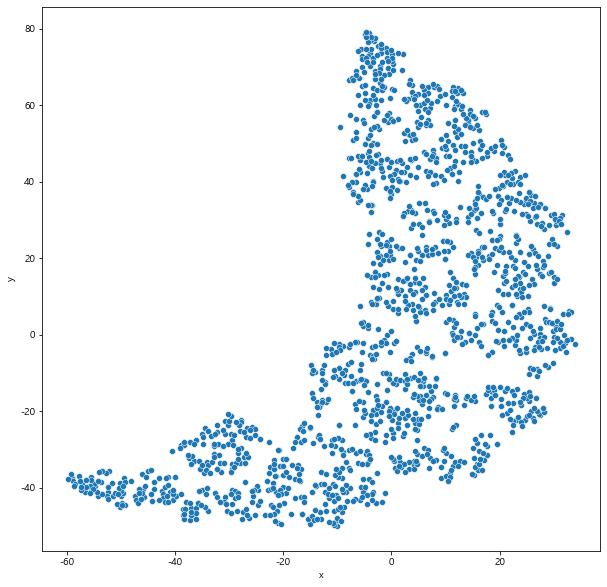

In [8]:
# 시각화
embed_df = pd.DataFrame(embed, columns=['x', 'y'])

plt.figure(figsize=(10, 10))
sns.scatterplot(data=embed_df, x='x', y='y')

In [9]:
from sklearn.cluster import KMeans

In [10]:
# K-means 클러스터링
# ㅋ
kmeans = KMeans(n_clusters=10, random_state=42).fit(extract_vector)
k_labels = kmeans.labels_

embed_df['label'] = k_labels

<AxesSubplot:xlabel='x', ylabel='y'>

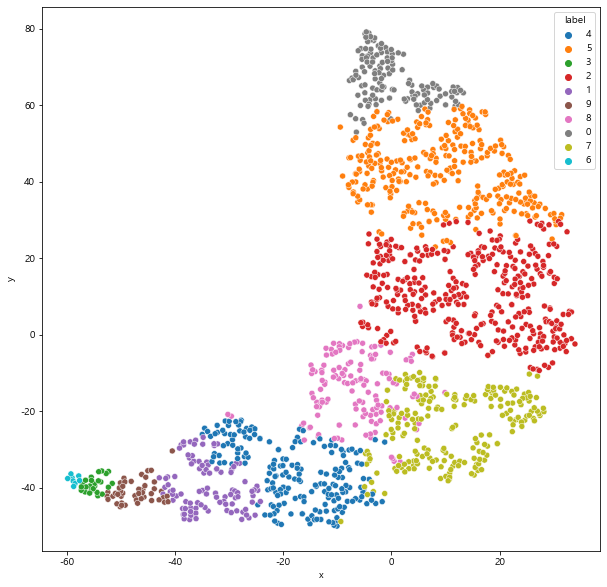

In [11]:
embed_df['label'] = embed_df['label'].astype('string')
plt.figure(figsize=(10, 10))
sns.scatterplot(data=embed_df, x='x', y='y', hue='label')

In [12]:
np.unique(k_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([130, 100, 362,  25, 195, 309,   8, 210, 134,  45], dtype=int64))